#### Problem Statement:This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=[15,10]
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.shape, test.shape

((35000, 20), (15000, 19))

In [3]:
combined=pd.concat([train,test], ignore_index=True)
combined.shape

(50000, 20)

In [4]:
combined.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [5]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


# Univariate Analysis

In [6]:
print(combined["imp_surcharge"].unique())
print(combined["store_and_fwd_flag"].unique())
print(combined["mta_tax"].unique())
print(combined["rate_code"].unique())

#converting above variables into object

[0.3 0. ]
['N' 'Y']
[0.5 0. ]
[1 3 5 4 2]


In [7]:
combined["imp_surcharge"]=combined["imp_surcharge"].astype("object")
combined["store_and_fwd_flag"]=combined["store_and_fwd_flag"].astype("object")
combined["mta_tax"]=combined["mta_tax"].astype("object")
combined["rate_code"]=combined["rate_code"].astype("object")
combined["payment_type"]=combined["payment_type"].astype("object")

In [8]:
combined.dtypes

trip_distance              float64
rate_code                   object
store_and_fwd_flag          object
payment_type                object
fare_amount                float64
extra                      float64
mta_tax                     object
tip_amount                 float64
tolls_amount               float64
imp_surcharge               object
total_amount               float64
pickup_location_id           int64
dropoff_location_id          int64
year                         int64
month                        int64
day                          int64
day_of_week                  int64
hour_of_day                  int64
trip_duration              float64
calculated_total_amount    float64
dtype: object

In [9]:
combined.select_dtypes(include=np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

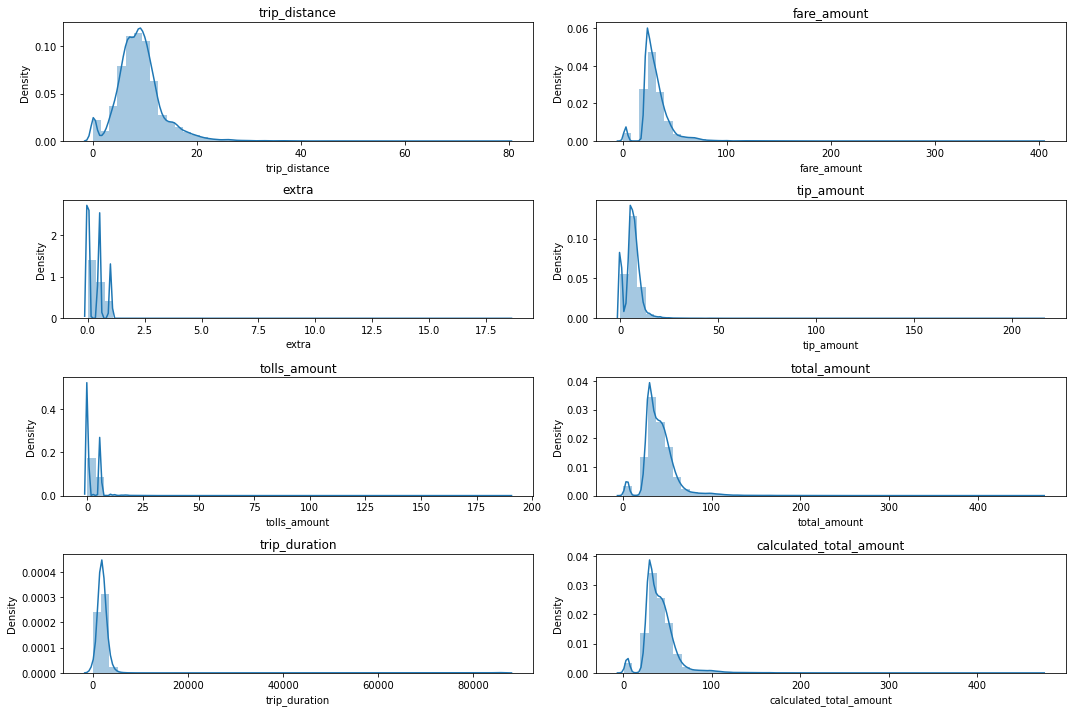

In [10]:
num=['trip_distance','fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_duration', 'calculated_total_amount']

nrows=4
ncols=2
iterator=1

for i in num:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined[i].dropna())
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

#all are skewed

In [11]:
combined.select_dtypes(include="object").columns

Index(['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge'],
      dtype='object')

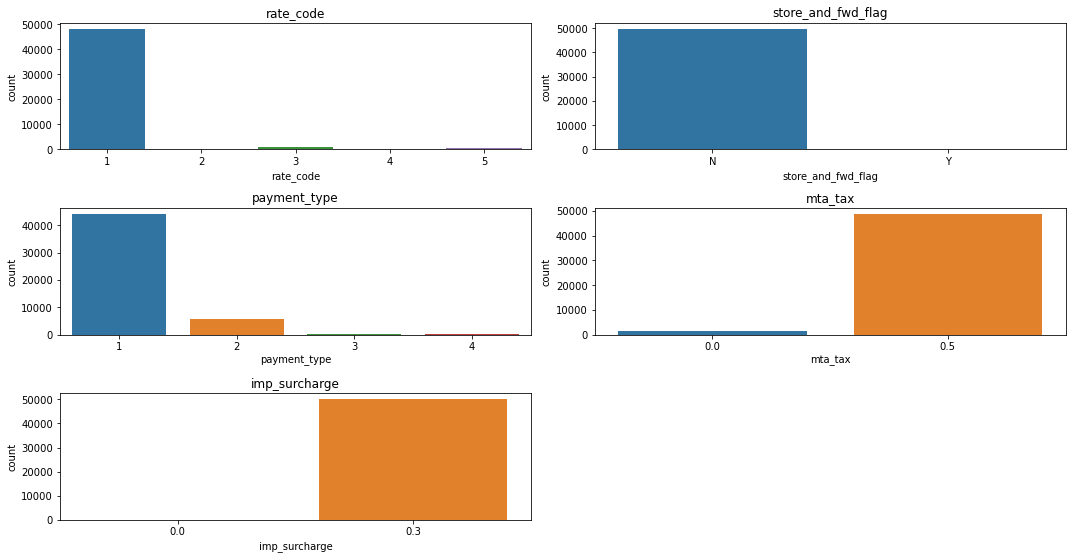

In [12]:
cat=['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge']
nrows=4
ncols=2
iterator=1

for i in cat:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined[i].dropna())
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [13]:
num=['trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'trip_duration',
     'total_amount']

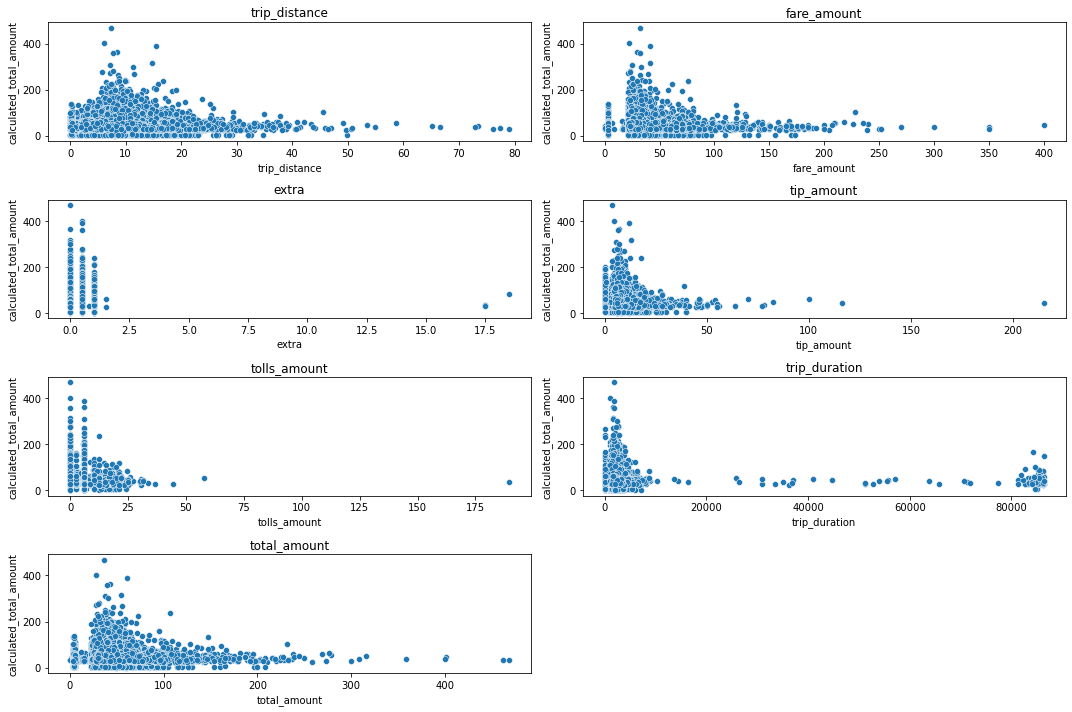

In [14]:
#num vs target

nrows=4
ncols=2
iterator=1

for i in num:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined[i], combined["calculated_total_amount"])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

#there are outliers

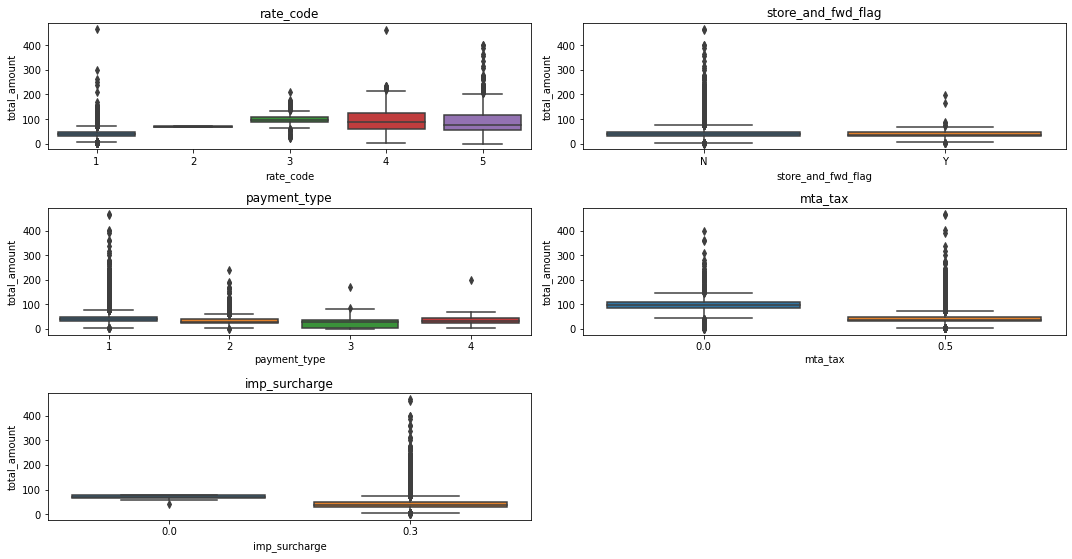

In [15]:
#cat vs target

nrows=4
ncols=2
iterator=1

for i in cat:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined[i], combined["total_amount"])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

#there are outliers

#### incase if the data has outliers and we dont want to remove, then we can use RobustScaler

# Missing Values

In [16]:
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [17]:
combined.year.unique() #can drop this

array([2018], dtype=int64)

<AxesSubplot:>

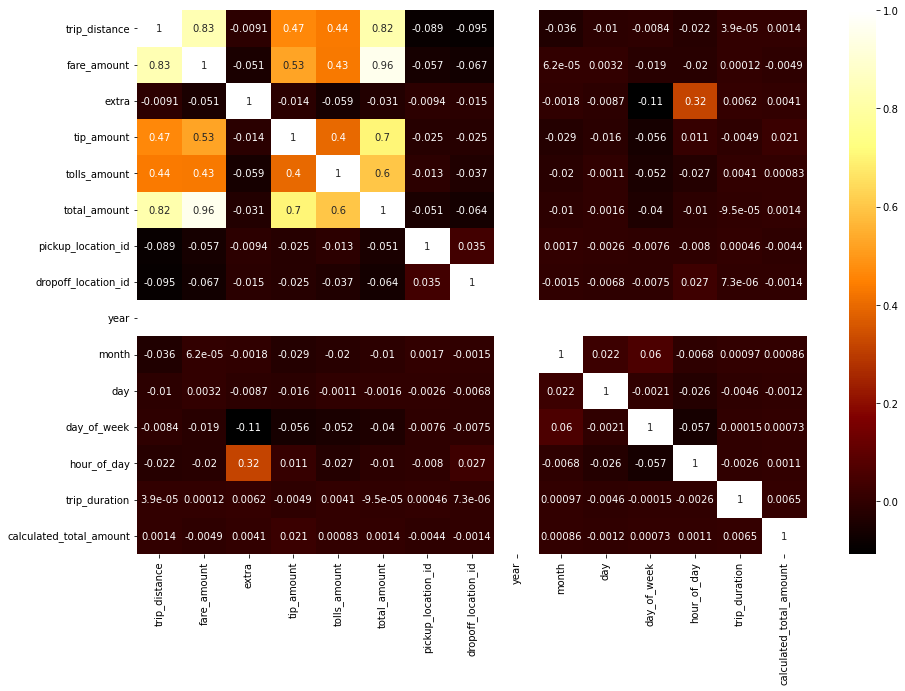

In [18]:
#bivariate

sns.heatmap(combined.corr(), annot=True, cmap="afmhot")

#correlation is very weak

# Feature Engineering

In [19]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

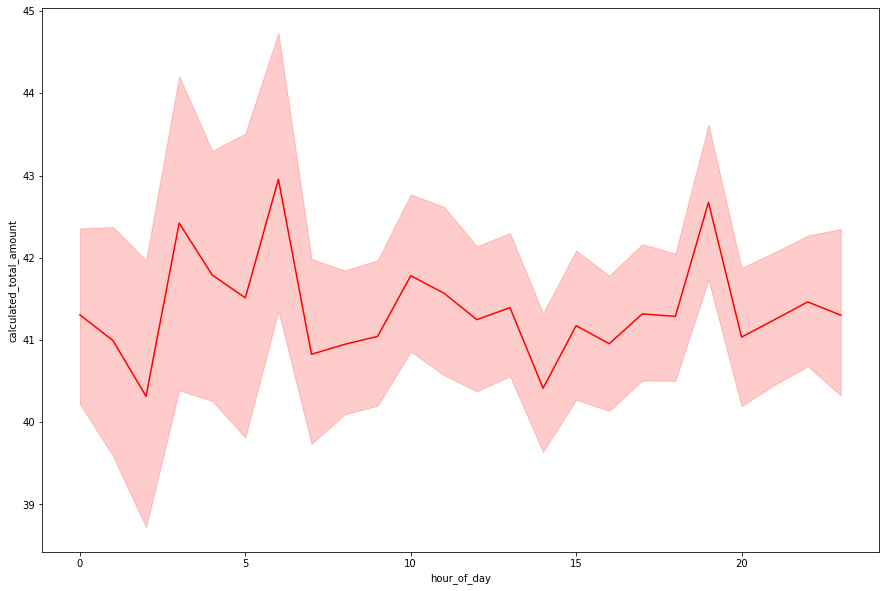

In [20]:
#to create a new variable rush hour for peak hours


sns.lineplot(combined["hour_of_day"],combined["calculated_total_amount"], color="r")
plt.show()

In [21]:
combined["rush_hour"]=combined["hour_of_day"].apply(lambda x:1 if x in [6,10,15,16,17,18,19,20] else 0)
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,262,138,2018,3,7,2,6,2131.0,24.30,1
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,263,236,2018,2,25,6,10,2377.0,37.40,1
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,138,230,2018,1,29,0,8,1286.0,30.36,0
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,...,186,138,2018,9,25,1,20,2586.0,4.30,1
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,...,162,87,2018,8,20,0,21,1575.0,23.80,0


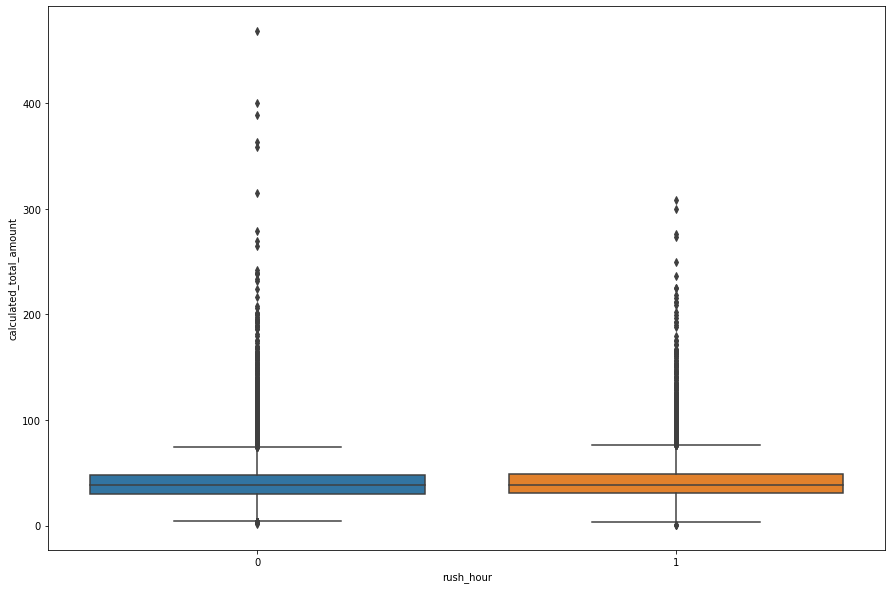

In [22]:
sns.boxplot(combined["rush_hour"], combined["calculated_total_amount"])
plt.show()

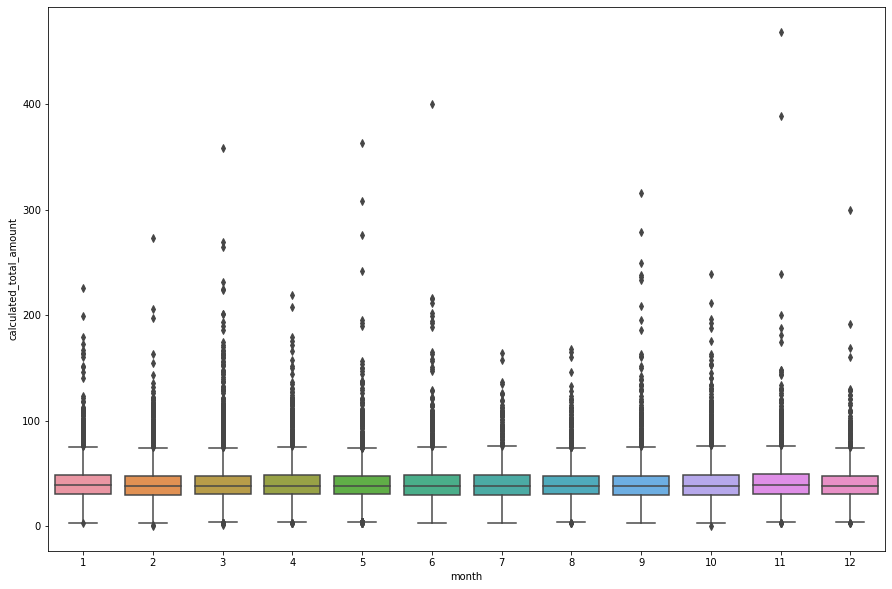

In [23]:
#to find relation between month, day, day of week with target column

sns.boxplot(combined["month"], combined["calculated_total_amount"])
plt.show()

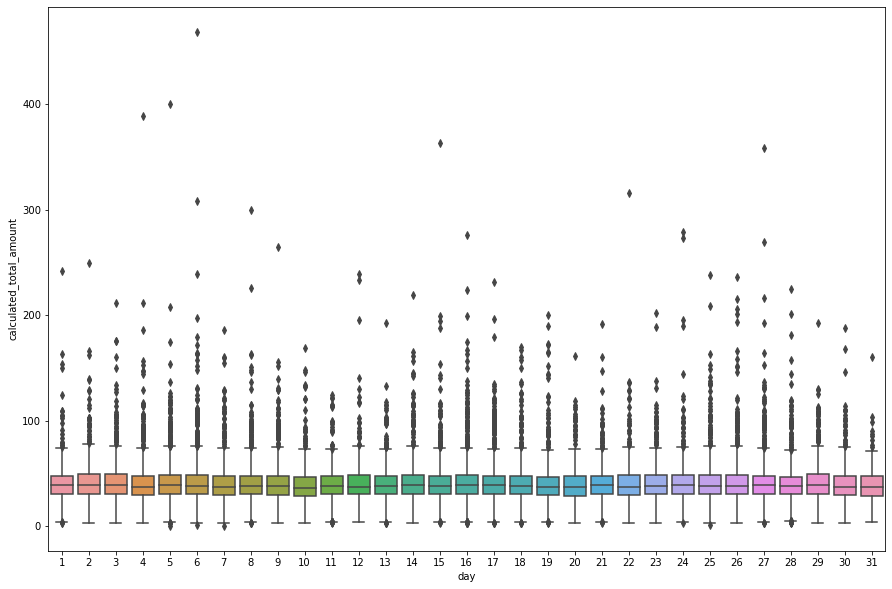

In [24]:
sns.boxplot(combined["day"], combined["calculated_total_amount"])
plt.show()

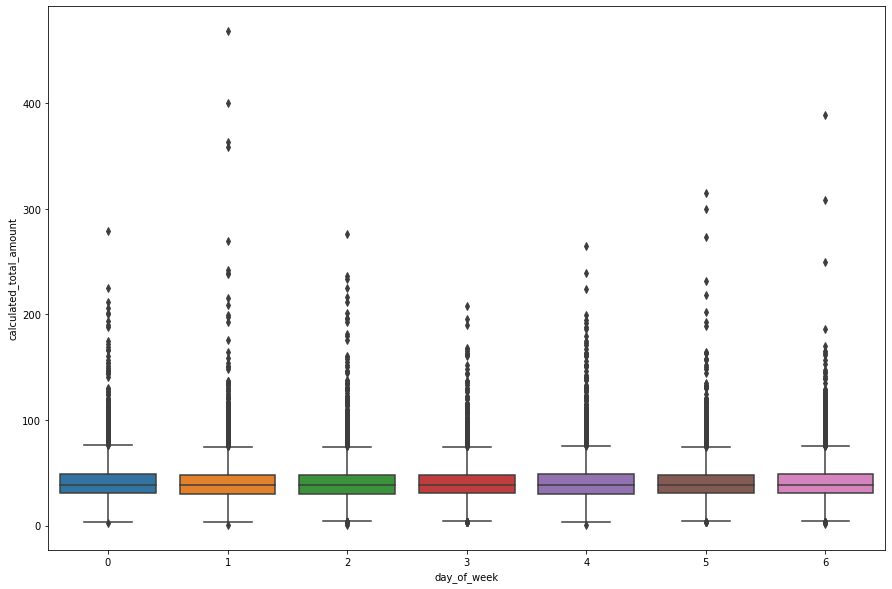

In [25]:
sns.boxplot(combined["day_of_week"], combined["calculated_total_amount"])
plt.show()

#### Clustering

In [26]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

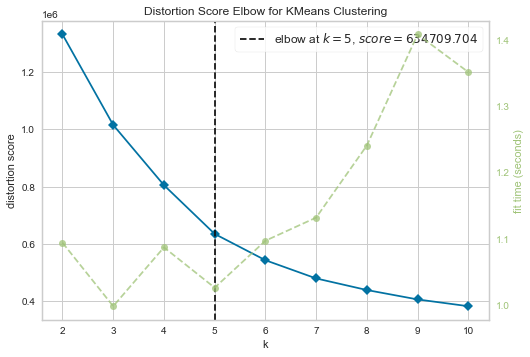

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans=KMeans()
visualizer=KElbowVisualizer(estimator= kmeans, random_state=0)

data= combined.loc[:, ["day_of_week","hour_of_day","month"]]

visualizer.fit(data)
visualizer.show()

In [28]:
nclusters=5

kmeans=KMeans(n_clusters=5, random_state=0)

k=kmeans.fit(data)

combined["clusters"]= k.labels_

combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,138,2018,3,7,2,6,2131.0,24.30,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,236,2018,2,25,6,10,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,...,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,...,87,2018,8,20,0,21,1575.0,23.80,0,3


# Split the data into train and test

In [29]:
newtrain=combined.loc[0:train.shape[0]-1,:]

newtest=combined.loc[train.shape[0]:,:]
newtest=newtest.drop("calculated_total_amount", axis=1)
newtrain.shape, newtest.shape

((35000, 22), (15000, 21))

# Outlier Removal

In [30]:
Q1=newtrain.quantile(0.25)
Q3=newtrain.quantile(0.75)

IQR=Q3-Q1

UL= Q3+1.5*IQR
LL= Q1-1.5*IQR

train_wo=newtrain.loc[~((newtrain>UL)|(newtrain<LL)).any(axis=1)]
train_wo.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,138,2018,3,7,2,6,2131.0,24.30,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,...,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,...,87,2018,8,20,0,21,1575.0,23.80,0,3
5,12.65,1,N,1,41.5,0.0,0.5,0.02,5.76,0.3,...,100,2018,1,8,0,7,2029.0,30.95,0,4


# Scaling

In [31]:
#Min Max Scaler

train_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26105 entries, 0 to 34997
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            26105 non-null  float64
 1   rate_code                26105 non-null  object 
 2   store_and_fwd_flag       26105 non-null  object 
 3   payment_type             26105 non-null  object 
 4   fare_amount              26105 non-null  float64
 5   extra                    26105 non-null  float64
 6   mta_tax                  26105 non-null  object 
 7   tip_amount               26105 non-null  float64
 8   tolls_amount             26105 non-null  float64
 9   imp_surcharge            26105 non-null  object 
 10  total_amount             26105 non-null  float64
 11  pickup_location_id       26105 non-null  int64  
 12  dropoff_location_id      26105 non-null  int64  
 13  year                     26105 non-null  int64  
 14  month                 

In [32]:
#drop the insignificant variables

finaltrain = train_wo.drop(["calculated_total_amount","year", 
                            "pickup_location_id","dropoff_location_id"], axis=1)
finaltest = newtest.drop(["year","pickup_location_id","dropoff_location_id"], axis=1)



In [33]:
finaltrain.select_dtypes(include=np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'rush_hour', 'clusters'],
      dtype='object')

In [34]:
num_cols=['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration']

from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()

for i in num_cols:
    
    finaltrain.loc[:,i] = mm.fit_transform(pd.DataFrame(finaltrain.loc[:,i]))
    finaltest.loc[:,i] = mm.transform(pd.DataFrame(finaltest.loc[:,i]))

In [35]:
finaltrain

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,rush_hour,clusters
0,0.506764,1,N,1,0.408034,0.0,0.5,0.602071,0.403927,0.3,0.482450,0.181818,0.200000,0.333333,0.260870,0.566583,1,4
2,0.542841,1,N,1,0.735729,0.0,0.5,0.710799,0.403927,0.3,0.735922,0.000000,0.933333,0.000000,0.347826,0.329689,0,4
3,0.534386,1,N,1,0.492600,0.5,0.5,0.684172,0.403927,0.3,0.566243,0.727273,0.800000,0.166667,0.869565,0.694141,1,3
4,0.325817,1,N,1,0.312896,0.5,0.5,0.337278,0.000000,0.3,0.283196,0.636364,0.633333,0.000000,0.913043,0.410709,0,3
5,0.711950,1,N,1,0.735729,0.0,0.5,0.001479,0.403927,0.3,0.592681,0.000000,0.233333,0.000000,0.304348,0.537987,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34990,0.461105,1,N,1,0.386892,0.5,0.5,0.388314,0.000000,0.3,0.345780,0.181818,0.800000,1.000000,0.869565,0.347631,1,0
34991,0.416009,1,Y,2,0.439746,0.0,0.5,0.000000,0.000000,0.3,0.297237,0.818182,0.600000,0.666667,0.304348,0.700028,0,1
34993,0.246900,1,N,1,0.355180,0.0,0.5,0.358728,0.000000,0.3,0.309933,0.727273,0.766667,0.000000,0.652174,0.448556,1,1
34994,0.275648,1,N,1,0.334038,1.0,0.5,0.449704,0.000000,0.3,0.328305,0.454545,0.833333,0.166667,0.695652,0.493131,1,0


In [36]:
#dummy


dummytrain=pd.get_dummies(finaltrain, drop_first=True)
dummytest=pd.get_dummies(finaltest, drop_first=True)

In [37]:
dummytrain.shape, dummytest.shape

((26105, 22), (15000, 23))

In [38]:
#rate code 2 is an extra variable in the dummytest


dummytest.drop('rate_code_2', axis=1, inplace=True)

In [39]:
dummytest.shape, dummytrain.shape

((15000, 22), (26105, 22))

# Model Building

In [40]:
y=train_wo["calculated_total_amount"]
x=dummytrain

In [41]:
#training and validation set to build models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [42]:
#Linear Regression


kfold=KFold(n_splits=5, shuffle=True, random_state=42)

lr=LinearRegression()

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=lr.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lr.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 12.36551935198674
RMSE Test: 12.376492810045997


In [43]:
#Decision tree Regressor


kfold=KFold(n_splits=5, shuffle=True, random_state=42)


dt=DecisionTreeRegressor()

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=dt.fit(xtrain,ytrain).predict(xtrain)
    pred_test=dt.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

#overfitting as training error is zero and testing error is 18

RMSE Train: 2.162435776449301e-17
RMSE Test: 18.02887662787601


In [44]:
#Ridge

ridge=Ridge(alpha=1)

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_test=ridge.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 12.365651409180904
RMSE Test: 12.375639479509038


In [45]:
#Lasso

lasso=Lasso(alpha=0.5)

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=lasso.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lasso.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 12.392158144315555
RMSE Test: 12.391967385912054


In [46]:
#RandomForest Regressor

rf=RandomForestRegressor()

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 4.72532070295245
RMSE Test: 12.620302715426684


In [47]:
#AdaBoostRegressor

ada=AdaBoostRegressor()

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=ada.fit(xtrain,ytrain).predict(xtrain)
    pred_test=ada.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 12.360051565186776
RMSE Test: 12.378701306601569


In [48]:
#GradientBoostRegressor

gbm=GradientBoostingRegressor()

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=gbm.fit(xtrain,ytrain).predict(xtrain)
    pred_test=gbm.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 12.200447831959028
RMSE Test: 12.385979091033573


In [49]:
from xgboost import XGBRegressor

In [51]:
#XGBoost

xgb=XGBRegressor()

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 10.028084396358583
RMSE Test: 12.808312825916971


In [50]:
from lightgbm import LGBMRegressor

In [52]:
#LightGBM Regressor


lgbm=LGBMRegressor()

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=lgbm.fit(xtrain,ytrain).predict(xtrain)
    pred_test=lgbm.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 11.549946969135831
RMSE Test: 12.447423652558982


## Parameter Tuning

for XGboost

max_depth=2
n_estimators=49
reg_lambda=1.6

In [53]:
#XGBoost

xgb=XGBRegressor(max_depth=2,n_estimators=49,reg_lambda=1.6)

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 12.27149670428059
RMSE Test: 12.383288679798659


In [54]:
#RandomForestRegressor

rf=RandomForestRegressor(n_estimators=500, min_samples_leaf=4, random_state=0)

rmse_train=[]
rmse_test=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

    
print("RMSE Train:", np.mean(rmse_train))
print("RMSE Test:", np.mean(rmse_test))

RMSE Train: 7.834335752808966
RMSE Test: 12.504883281288372


## Final Prediction

In [56]:
rf=RandomForestRegressor(n_estimators=500, min_samples_leaf=4, random_state=0)

pred=[]
for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest= x.iloc[test_index] #validation set
    ytest=y.iloc[test_index]  #validation set
    #pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))
    #rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    #rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

In [60]:
finalpred=pd.DataFrame(pred).T.mean(axis=1)
sub=pd.DataFrame({"calculated_total_amount":finalpred})

sub.to_csv("RFModel-Para.csv", index=False)

In [64]:
#XGBoost

xgb=XGBRegressor(max_depth=2,n_estimators=49,reg_lambda=1.6)

pred1=[]

for train_index, test_index in kfold.split(x,y):
    xtrain=x.iloc[train_index]
    ytrain=y.iloc[train_index]
    #xtest= x.iloc[test_index] #validation set
    #ytest=y.iloc[test_index]  #validation set
    #pred_train=xgb.fit(xtrain,ytrain).predict(xtrain)
    pred1.append(xgb.fit(xtrain,ytrain).predict(dummytest))
    #rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    #rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

finalpred1=pd.DataFrame(pred1).T.mean(axis=1)
sub1=pd.DataFrame({"calculated_total_amount":finalpred1})

sub1.to_csv("XGBModel-Para.csv", index=False)

In [69]:

#StackingRegressor


from sklearn.ensemble import StackingRegressor

base=[("lr", lr), ("gbm", gbm), ("lgbm", lgbm)]

final= RandomForestRegressor(n_estimators=500, min_samples_leaf=4, random_state=0)

stack = StackingRegressor(estimators=base, final_estimator=final, cv=5)

pred=stack.fit(x,y).predict(dummytest)

#finalpred= pd.DataFrame(pred).T.mean(axis=1)

sub=pd.DataFrame({"calculated_total_amount":pred})

sub.to_csv("StackingRegressorwithRFtuned.csv", index=False)

<AxesSubplot:>

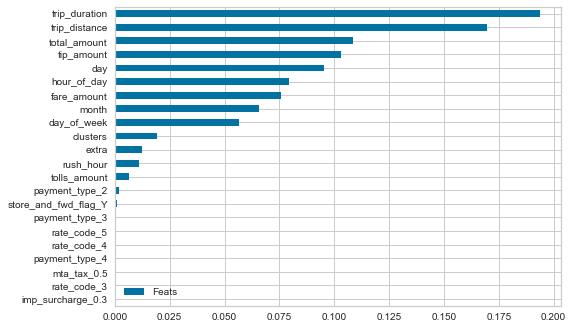

In [70]:
#can build again with the most important features and check for RMSE


pd.DataFrame(rf.feature_importances_, index=dummytest.columns, 
            columns=["Feats"]).sort_values(by="Feats").plot(kind="barh")